# Importando bibliotecas

In [178]:
from numpy import *
from scipy.integrate import odeint
from matplotlib.pyplot import *
from functools import partial
import numpy as np

# Definindo modelo 

In [179]:
def matriaquia(y, t, beta_p, beta_m, mu, gamma, rho, omega_m, delta_m, sigma_p, omega_p, delta_p):
    S = y[0]
    L = y[1]
    P = y[2]
    M = y[3]
    R = y[4]

    dSdt = mu*(1-gamma) - ( beta_p*P + beta_m*M )*S - mu*S
    dLdt = (beta_p*P + beta_m*M)*S - (sigma_p*omega_p - (1-sigma_p)*omega_m)*L - mu*L
    dPdt = rho*sigma_p*omega_p*L - mu*P - delta_p*P
    dMdt = rho*(1-sigma_p)*omega_m*L - mu*M - delta_m*M
    dRdt = (1-rho)*sigma_p*omega_p*L + (1-rho)*(1-sigma_p)*omega_m*L + delta_m*M + delta_p*P - mu*R - mu*gamma

    return [dSdt, dLdt, dPdt, dMdt, dRdt]

#  Parametros

In [180]:
mu = 1/70
gamma = 0.75
beta_m = 0.05
beta_p = 18*beta_m
rho = 0.05
sigma_p = 0.9
omega_p = 0.25
omega_m = 0.1
delta_m = 1/12
delta_p = 1/12

# Condicoes iniciais

In [181]:
S0          = 0.95
L0          = 0
P0          = 0.05
M0          = 0
R0          = 0

condicoes_iniciais = [S0, L0, P0, M0, R0]

# Chamando Modelo

In [182]:
tempo = arange(0, 300, 1)
params = (beta_p, beta_m, mu, gamma, rho, omega_m, delta_m, sigma_p, omega_p, delta_p)
resultados = odeint(matriaquia, condicoes_iniciais, tempo, params)

# Plotando graficos

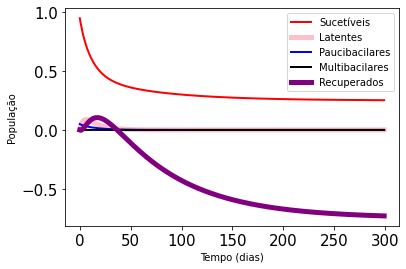

In [183]:
params = (beta_p, beta_m, mu, gamma, rho, omega_m, delta_m, sigma_p, omega_p, delta_p)

plot(tempo, resultados[:, 0], color='red',zorder=1, linewidth=2, label='Sucetíveis')
plot(tempo, resultados[:, 1], color='pink',zorder=1, linewidth=5, label='Latentes')
plot(tempo, resultados[:, 2], color='b',zorder=1, linewidth=2, label='Paucibacilares')
plot(tempo, resultados[:, 3], color='black',zorder=1, linewidth=2, label='Multibacilares')
plot(tempo, resultados[:, 4], color='purple',zorder=1, linewidth=5, label='Recuperados')

tick_params(labelsize= 15)

xlabel('Tempo (dias)')
ylabel('População')

legend()


In [184]:
suceptiveis_vacinados = []
latentes_vacinados = []
pauci_vacinados = []
multi_vacinados = []
recuperados_vacinados = []

KK = arange(0, 300, .1)

for i in KK:
    params = (i, beta_m, mu, gamma, rho, omega_m, delta_m, sigma_p, omega_p, delta_p)

    y = odeint(matriaquia, condicoes_iniciais, tempo, params)
    
    suceptiveis_vacinados.append(y[:, 0][-1])
    latentes_vacinados.append(y[:, 1][-1])
    pauci_vacinados.append(y[:, 2][-1])
    multi_vacinados.append(y[:, 3][-1])
    recuperados_vacinados.append(y[:, 4][-1])



In [185]:
suceptiveis = []
latentes = []
pauci = []
multi = []
recuperados = []

gamma_sem_vacina = 0
sigma_sem_vacina = 0.73

KK = arange(0, 300, .1)

for i in KK:
    params = (i, beta_m, mu, gamma_sem_vacina, rho, omega_m, delta_m, sigma_sem_vacina, omega_p, delta_p)

    y = odeint(matriaquia, condicoes_iniciais, tempo, params)
    
    suceptiveis.append(y[:, 0][-1])
    latentes.append(y[:, 1][-1])
    pauci.append(y[:, 2][-1])
    multi.append(y[:, 3][-1])
    recuperados.append(y[:, 4][-1])

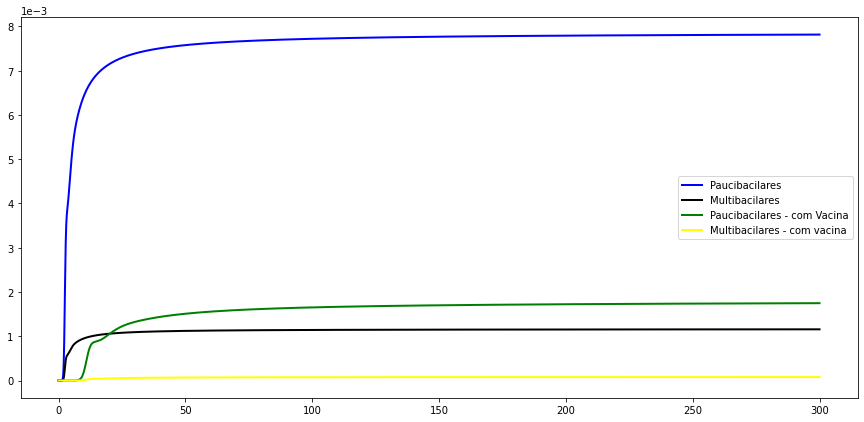

In [186]:
fig, ax = subplots(figsize=(15,7))


ax.plot(KK, pauci, color='b',zorder=1, linewidth=2, label='Paucibacilares')
ax.plot(KK, multi, color='black',zorder=1, linewidth=2, label='Multibacilares')
ax.plot(KK, pauci_vacinados, color='green',zorder=1, linewidth=2, label='Paucibacilares - com Vacina')
ax.plot(KK, multi_vacinados, color='yellow',zorder=1, linewidth=2, label='Multibacilares - com vacina')
ticklabel_format(axis="y", style="sci", scilimits=(0,0))

legend()

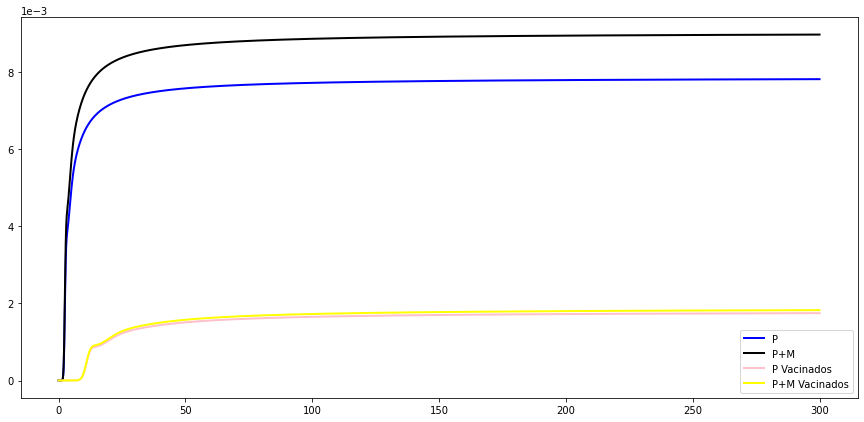

In [187]:
fig, ax = subplots(figsize=(15,7))

resultA = [a + b for a, b in zip(pauci, multi)]
resultB = [a + b for a, b in zip(pauci_vacinados, multi_vacinados)]

ax.plot(KK, pauci, color='b',zorder=1, linewidth=2, label='P')
ax.plot(KK, resultA, color='black',zorder=1, linewidth=2, label='P+M')

ax.plot(KK, pauci_vacinados, color='pink',zorder=1, linewidth=2, label='P Vacinados')
ax.plot(KK, resultB, color='yellow',zorder=1, linewidth=2, label='P+M Vacinados')

ticklabel_format(axis="y", style="sci", scilimits=(0,0))
autoscale()
legend()

# Beta Relativo


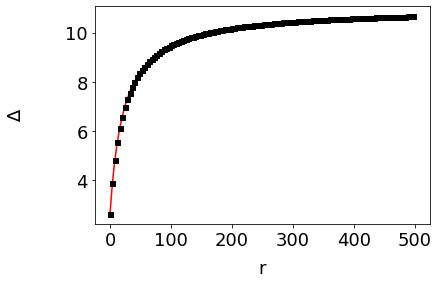

In [192]:
size_beta = 500
def getLimiarBeta(hasVaccine, r):
    mi = 1/70
    sigmaP = 0.73 # sigmaP = 0.9
    omegaP = 1/4
    omegaM = 1/10
    rho = 0.05
    gama = 0.0 # gama = 0.75
    deltaM = 1/12
    deltaP = 1/12
    if hasVaccine:
        sigmaP = 0.9
        gama = 0.75

    nominator = (mi+(sigmaP*omegaP)+(1-sigmaP)*omegaM)
    denominator = (rho*(1-gama)*(omegaP*sigmaP*(mi+deltaM)+r*omegaM*(1-sigmaP)*(mi+deltaP)))

    return (nominator/denominator)

deltas = []
absoluteDeltas = []

for i in range(size_beta):
    delta = (getLimiarBeta(True, i) - getLimiarBeta(False, i))/getLimiarBeta(False, i)
    deltas.append(delta)

for i in range(size_beta):
    if i % 4 == 0:
        absoluteDeltas.append(deltas[i])
    else:
        absoluteDeltas.append(None)

plot(range(size_beta), deltas, linestyle='solid', label='r', color= 'red')
plot(absoluteDeltas, "s", markersize=5, color='black')
xlabel('r', labelpad=10)
ylabel('∆', labelpad=40)
show()